In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import numpy as np

- A) White “SHOP NOW”
- B) Red “SHOP NOW”
- C) White “SEE DEALS”
- D) Red “SEE DEALS”

## 1.&nbsp; State the Null Hypothesis and the Alternative Hypothesis.

**Null Hypothesis ($H_0$):** The click rate on each website (A, B, and C) is equal.

**Alternative Hypothesis ($H_A$):** At least one of the websites has a significantly different click rate compared to the others, either better or worse.

## 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

Commonly used levels are 0.1, 0.05 and 0.01.

In our case, as we don't expect the color of a button to have a profound impact on the course of history, a comfortable alpha level of 0.1 would be suitable.

In [ ]:
alpha = 0.05

Import data

In [3]:
# A_test.csv
url = "https://drive.google.com/file/d/17b91N7Cip9_hl5A741LXz8kfIfYX0t0q/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
A_test = pd.read_csv(path)


In [4]:
# B_test.csv
url = "https://drive.google.com/file/d/1NqHETBlY8E4TCfnS1zOvJbA3V3jVRn7Z/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
B_test = pd.read_csv(path)

In [5]:
# C_test.csv
url = "https://drive.google.com/file/d/16-Nw7Nv_qmvLppzw-vnuxaQ0LLKjQfeQ/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
C_test = pd.read_csv(path)

In [6]:
# D_test.csv
url = "https://drive.google.com/file/d/1_Aiq8z79uSbijNlebpa8iJMRWFp-bYl5/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
D_test = pd.read_csv(path)

Make copies

In [ ]:
A_test=A_test.copy()
B_test=B_test.copy()
C_test=C_test.copy()
D_test=D_test.copy()

In [ ]:
C_test

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,288,True,Homepage Version C - white SEE DEALS • htt...
1,25,div,mySidebar,283,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,262,True,NaN
3,69,a,iPhone,234,True,NaN
4,105,a,Accessories,1288,True,NaN
5,36,a,Chargers & Cables,1224,False,NaN
6,99,a,iPhone Accessories,1175,False,NaN
7,68,a,Watch Accessories,1264,False,NaN
8,13,a,Mac Accessories,1203,False,NaN
9,15,a,AirTag,202,False,NaN


In [ ]:
A,B,C

(25326, 24747, 24876)

In [ ]:
# A_test.tail(50)
# B_test.tail(70)
# C_test.tail(70)
# D_test.head(3)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
7,68,a,Watch Accessories,1261,False,NaN
8,13,a,Mac Accessories,1308,False,NaN
9,15,a,AirTag,206,False,NaN
10,9,a,iPad,186,True,NaN
11,52,a,Watch,212,True,NaN
12,33,a,Storage,198,True,NaN
13,90,a,Services,177,True,NaN
14,59,a,Contact,266,True,NaN
15,17,a,Newsletter,56,True,NaN
16,74,a,Subscribe,56,True,NaN


In [ ]:
B_test

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,236,True,Homepage Version B - red SHOP NOW • https:...
1,25,div,mySidebar,304,True,created 2021-10-27 • 14 days 0 hours 34 mi...
2,4,a,Mac,268,True,NaN
3,69,a,iPhone,260,True,NaN
4,105,a,Accessories,1214,True,NaN
5,36,a,Chargers & Cables,1259,False,NaN
6,99,a,iPhone Accessories,1237,False,NaN
7,68,a,Watch Accessories,1221,False,NaN
8,13,a,Mac Accessories,1210,False,NaN
9,15,a,AirTag,195,False,NaN


In [ ]:
A_test

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,269,True,Homepage Version A - white SHOP NOW • http...
1,25,div,mySidebar,309,True,created 2021-09-14 • 14 days 0 hours 34 mi...
2,4,a,Mac,279,True,NaN
3,69,a,iPhone,246,True,NaN
4,105,a,Accessories,1235,True,NaN
5,36,a,Chargers & Cables,1261,False,NaN
6,99,a,iPhone Accessories,1226,False,NaN
7,68,a,Watch Accessories,1261,False,NaN
8,13,a,Mac Accessories,1308,False,NaN
9,15,a,AirTag,206,False,NaN


In [ ]:
A_test.iloc[1,-1]
B_test.iloc[1,-1]
C_test.iloc[1,-1]
D_test.iloc[1,-1]

'created 2021-10-27   •   14 days 0 hours 34 mins   •   25233 visits, 23062 clicks'

In [ ]:
A_test.iloc[1,-1]

'created 2021-09-14   •   14 days 0 hours 34 mins   •   25326 visits, 23174 clicks'

In [ ]:
A_visits=25326
B_visits=24747
C_visits=24876
D_visits=25233

In [ ]:
A_test.loc[A_test["Name"] == "SHOP NOW", ["No. clicks"]]

,No. clicks
21,512


In [ ]:
A_test.loc[A_test["Name"] == "SHOP NOW", ["No. clicks"]].iloc[0,0]

512

In [ ]:
Bottom_click_A= A_test.loc[A_test["Name"] == "SHOP NOW", ["No. clicks"]].iloc[0,0]# 512
Bottom_click_B= B_test.loc[B_test["Name"] == "SHOP NOW", ["No. clicks"]].iloc[0,0]# 281
Bottom_click_C= C_test.loc[C_test["Name"] == "SEE DEALS", ["No. clicks"]].iloc[0,0]# 527
Bottom_click_D= D_test.loc[D_test["Name"] == "SEE DEALS", ["No. clicks"]].iloc[0,0]# 193

11 days of duration

In [ ]:
Bottom_click=[512,281,527,193]

In [ ]:
Bottom_click=[Bottom_click_A,Bottom_click_B,Bottom_click_C,Bottom_click_D]

No_Clicks

In [ ]:
A_visits=25326
B_visits=24747
C_visits=24876
D_visits=25233

In [ ]:
No_Clicks_A =  A_visits -512
No_Clicks_B = B_visits -281
No_Clicks_C = C_visits -527
No_Clicks_D = D_visits -193

“No-click” is simply calculated as visits - clicks

In [ ]:
No_Clicks_A
No_Clicks_B
No_Clicks_C
No_Clicks_D

25040

In [16]:
#Data
Bottom_click =[512,281,527,193]
No_click = [24814 , 24466, 24349,25040 ]

observed_results = pd.DataFrame([Bottom_click, No_click],
                                  columns = ["A", "B", "C", "D"],
                                  index = ["Click", "No-click"])
observed_results

#Alpha
alpha = 0.05

#chi2_contingency
from scipy import stats
chisq, pvalue, df, expected = stats.chi2_contingency(observed_results)

In [8]:
pvalue

2.7161216607868712e-48

In [9]:
if pvalue > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")


The p-value is smaller than alpha.


Since the p-value is smaller than alpha, we reject the Null Hypothesis because it is very likely that the clicks depend on the version of the website.

Rate= click/total visitors

In [10]:
Rate_A= 512/ 24814
Rate_B= 281/ 24466
Rate_C= 527/ 24349
Rate_D= 193/ 25040

In [11]:
Rate_A # 0.020633513339243976
Rate_B # 0.011485326575656013
Rate_C # 0.021643599326461045
Rate_D # 0.007707667731629393

0.007707667731629393

post-hoc test =running a new chi-square test for each pair of variants.

f you are 95% confident you won’t make a mistake in scenario 1, and 95% confident you won’t make a mistake in scenario 2, your confidence of not making a mistake in any of the 2 scenarios is 0.95 * 0.95 = 90.25%.

When interpreting these paired comparisons, rather than setting the α-level (p-value) at 0.1*, we divide 0.1* by the number of paired comparisons that we will be making. The result is our new α-level (p-value).

## Post Hoc Tests --------------------------------

In brief: Post hoc tests, also known as post hoc comparisons or pairwise comparisons, are statistical procedures used in conjunction with a Chi-Squared test to determine specific differences between groups or conditions after obtaining significant results from the Chi-Squared test. Once the Chi-Squared test reveals a significant difference among the variables being examined, post hoc tests are employed to identify which specific groups or categories are significantly different from each other.

We have 6 possible dual tests to perform:

* Version A - Version B
* Version A - Version C
* Version A - Version D
* Version B - Version C
* Version B - Version D
* Version C - Version D

- The level of alpha we selected for the chi-squared test cannot be same for the dual tests. If there was an error of 5% in each of the tests, this would sum up to much more than the 5% total we set for alpha, so we will need to be much more restrictive in the dual tests. Therefore, we will split the value of alpha equally among the dual tests to be performed.

In [14]:
possible_combinations = 6
alpha_post_hoc = alpha / possible_combinations
alpha_post_hoc

0.008333333333333333

In [20]:
for i in observed_results.columns:
   for j in observed_results.columns:
    print(observed_results.loc[:, [i, j]])


              A      A
Click       512    512
No-click  24814  24814
              A      B
Click       512    281
No-click  24814  24466
              A      C
Click       512    527
No-click  24814  24349
              A      D
Click       512    193
No-click  24814  25040
              B      A
Click       281    512
No-click  24466  24814
              B      B
Click       281    281
No-click  24466  24466
              B      C
Click       281    527
No-click  24466  24349
              B      D
Click       281    193
No-click  24466  25040
              C      A
Click       527    512
No-click  24349  24814
              C      B
Click       527    281
No-click  24349  24466
              C      C
Click       527    527
No-click  24349  24349
              C      D
Click       527    193
No-click  24349  25040
              D      A
Click       193    512
No-click  25040  24814
              D      B
Click       193    281
No-click  25040  24466
              D      C
Click      

In [23]:
observed_results

,A,B,C,D
Click,512,281,527,193
No-click,24814,24466,24349,25040


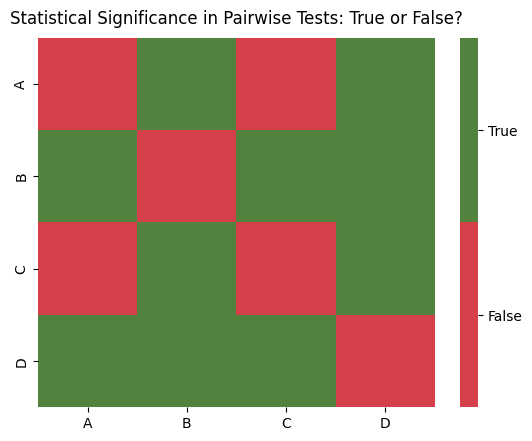

In [24]:
# empty dictionary to fill with our results
stat_significant_dict = {
                        "A": [],
                        "B": [],
                        "C": [],
                        "D": []
                         }

# compare each version to each other version
for i in observed_results.columns:
  for j in observed_results.columns:
    # use scipy to find the p-value of each pair
    chisq, pvalue, df, expected = stats.chi2_contingency(observed_results.loc[:, [i, j]], correction=False)
    # boolean: if the p-value is lower than alpha, our result is statistically significant
    stat_significant_dict[i].append(pvalue < alpha_post_hoc)

# create a DataFrame of results
stat_significant_df = pd.DataFrame(stat_significant_dict,
                                   index=observed_results.columns)

# create a heatmap from the DataFrame & red/green colour palette
red_green_palette = sns.diverging_palette(10, 120, n=2, s=70, l=50)
ax = sns.heatmap(stat_significant_df, cmap=red_green_palette)

# Manually specify colorbar labelling after it's been generated
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['False', 'True'])

# Add a title to the heatmap
ax.set_title("Statistical Significance in Pairwise Tests: True or False?", pad=10);

In [25]:
stat_significant_df

,A,B,C,D
A,False,True,False,True
B,True,False,True,True
C,False,True,False,True
D,True,True,True,False


It is evident that the version with the highest click-through rate, Version_C, exhibits a statistically significant difference when compared Versions B and D, but not to Version_A, which possesses the second-highest click-through rate. As a result, declaring a clear winner based on post hoc tests becomes challenging, therefore we can only say that both Version_C and Version_A are the winners.

